# Library verison setup

In [12]:
#%pip install "numpy<1.24.4" 

 # Check current working directory

In [13]:
!cat cryspy.in

[basic]
algo = RS
calc_code = ASE
tot_struc = 100
nstage = 2
njob = 100
jobcmd = zsh
jobfile = job_cryspy

[structure]
atype = Si
nat = 16
natot = 16

[ASE]
ase_python = ase_in.py

[option]

In [14]:
#!sed '1s/.*/Line_Num ID Spg_num Spg_sym Spg_num_opt Spg_sym_opt E_eV_atom Magmom Opt/' ./data/cryspy_rslt_energy_asc > ./data/cryspy_rslt_with_header.dat

In [15]:
#pkg_resource error fix by pip install setup tools 
from cryspy.interactive import action
action.clean(skip_yes=True)
action.initialize()

[2026-01-15 13:08:44,096][cryspy_init][INFO] 


Start CrySPY 1.4.0b10


[2026-01-15 13:08:44,121][cryspy_init][INFO] # ---------- Library version info
[2026-01-15 13:08:44,126][cryspy_init][INFO] pandas version: 2.3.2
[2026-01-15 13:08:44,161][cryspy_init][INFO] pymatgen version: 2025.6.14
[2026-01-15 13:08:44,166][cryspy_init][INFO] pyxtal version: 1.1.0
[2026-01-15 13:08:44,172][cryspy_init][INFO] # ---------- Read input file, cryspy.in
[2026-01-15 13:08:44,189][write_input][INFO] [basic]
[2026-01-15 13:08:44,192][write_input][INFO] algo = RS
[2026-01-15 13:08:44,196][write_input][INFO] calc_code = ASE
[2026-01-15 13:08:44,200][write_input][INFO] tot_struc = 100
[2026-01-15 13:08:44,204][write_input][INFO] nstage = 2
[2026-01-15 13:08:44,208][write_input][INFO] njob = 100
[2026-01-15 13:08:44,213][write_input][INFO] jobcmd = zsh
[2026-01-15 13:08:44,217][write_input][INFO] jobfile = job_cryspy
[2026-01-15 13:08:44,222][write_input][INFO] 
[2026-01-15 13:08:44,223][write_input][INFO] 

In [16]:
# ---------- EMT in ASE
#from ase.calculators.emt import EMT
from ase.constraints import FixSymmetry
import ipywidgets as widgets
#from chgnet.model import CHGNetCalculator
from ase.filters import FrechetCellFilter
from ase.io import read, write
from ase.optimize import FIRE, BFGS, LBFGS
from mattersim.forcefield import MatterSimCalculator
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
calculator = MatterSimCalculator(load_path="MatterSim-v1.0.0-5M.pth", device=device)
widgets.IntProgress()




IntProgress(value=0)

In [17]:
action.restart(
    njob=0,    # njob=0: njob in cryspy.in will be used
    calculator=calculator,
    optimizer='BFGS',    # 'FIRE', 'BFGS' or 'LBFGS'
    symmetry=True,       # default: True
    fmax=0.01,           # default: 0.01
    steps=0,          # default: 2000
)

[2026-01-15 13:08:57,491][cryspy_restart][INFO] 


Restart CrySPY 1.4.0b10


[2026-01-15 13:08:57,518][cryspy_restart][INFO] read input, cryspy.in
[2026-01-15 13:08:57,580][restart_interact][WARNING] nstage is ignored in interactive mode


  0%|          | 0/100 [00:00<?, ?it/s]

[2026-01-15 13:09:43,978][restart_interact][INFO] 
Done all structures!


# Structure visualization
from ase.visualize import view
atoms = action.get_atoms('opt', cid=0)    # 'init' or 'opt'
#view(atoms, viewer='ngl')    # viewer = 'ngl', 'ase', or 'x3d'
#Energy plot
fig, ax = action.plot_E(
              title=None,
              #ymax=2.0,
              #ymin=-0.5,
              markersize=12,
              marker_edge_width=1.0,
              marker_edge_color='black',
              alpha=1.0,
          )

In [18]:
import re
import os

def split_poscar_file(input_filename, output_folder):
    """
    Reads a file containing multiple POSCAR structures, creates a specified
    output folder, and writes each structure to a separate file within it.

    Args:
        input_filename (str): The name of the input file to read.
        output_folder (str): The name of the folder to save the files in.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    print(f"Output will be saved in the '{output_folder}' directory.")

    try:
        with open(input_filename, 'r') as f:
            content = f.read()
    except FileNotFoundError:
        print(f"Error: The file '{input_filename}' was not found.")
        return

    # Use a regular expression to split the file content by 'ID_X' lines
    structures = re.split(r'(?=ID_\d+)', content)

    # The first split element might be empty if the file starts with the delimiter
    if structures and not structures[0].strip():
        structures.pop(0)

    for i, structure_str in enumerate(structures):
        # Clean up the string to remove the ID line
        lines = structure_str.strip().split('\n')
        
        # Get everything after the ID line and prepend the new element line
        poscar_content = 'Cu Au\n' + '\n'.join(lines[1:]) # <-- MODIFIED LINE

        # Construct the full path for the output file
        output_filename = os.path.join(output_folder, f'{i}_POSCAR')
        
        # Write the content to the new POSCAR file
        with open(output_filename, 'w') as f_out:
            f_out.write(poscar_content)
        
        print(f"  -> Created {output_filename}")

# --- Example usage ---
if __name__ == '__main__':
    input_file = './data/opt_POSCARS'  # <-- Your source file
    output_dir = 'gen_1_structure'        # <-- The destination folder
    split_poscar_file(input_file, output_dir)

Output will be saved in the 'gen_1_structure' directory.
  -> Created gen_1_structure/0_POSCAR
  -> Created gen_1_structure/1_POSCAR
  -> Created gen_1_structure/2_POSCAR
  -> Created gen_1_structure/3_POSCAR
  -> Created gen_1_structure/4_POSCAR
  -> Created gen_1_structure/5_POSCAR
  -> Created gen_1_structure/6_POSCAR
  -> Created gen_1_structure/7_POSCAR
  -> Created gen_1_structure/8_POSCAR
  -> Created gen_1_structure/9_POSCAR
  -> Created gen_1_structure/10_POSCAR
  -> Created gen_1_structure/11_POSCAR
  -> Created gen_1_structure/12_POSCAR
  -> Created gen_1_structure/13_POSCAR
  -> Created gen_1_structure/14_POSCAR
  -> Created gen_1_structure/15_POSCAR
  -> Created gen_1_structure/16_POSCAR
  -> Created gen_1_structure/17_POSCAR
  -> Created gen_1_structure/18_POSCAR
  -> Created gen_1_structure/19_POSCAR
  -> Created gen_1_structure/20_POSCAR
  -> Created gen_1_structure/21_POSCAR
  -> Created gen_1_structure/22_POSCAR
  -> Created gen_1_structure/23_POSCAR
  -> Created gen_

# SOAP

In [14]:
from dscribe.descriptors import SOAP
import numpy as np
from cryspy.interactive import action
import pickle


/Users/kongkitimanon2024/Documents/Github/SOAP-similarity-and-Clustering/algori/CrySPY_git/src/cryspy/start/cryspy_init.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [1]:
import os
import numpy as np
from ase.io import read
from dscribe.descriptors import SOAP

# --- 1. Configuration ---
# Specify the path to the folder containing your POSCAR files
poscar_folder = './gen_1_structure/'

# SOAP descriptor hyperparameters (adjust as needed)
r_cut = 6.0
n_max = 4
l_max = 4
periodic = True

# --- 2. Dynamically Determine All Species ---
# It's crucial to provide SOAP with a list of all possible chemical species
# that can appear in your structures. We'll find them automatically.
print("Scanning files to determine all chemical species...")
all_species = set()
file_list = [f for f in os.listdir(poscar_folder) if f.endswith('POSCAR')]

for filename in file_list:
    try:
        filepath = os.path.join(poscar_folder, filename)
        atoms = read(filepath, format='vasp')
        all_species.update(atoms.get_chemical_symbols())
    except Exception as e:
        print(f"Could not read or process {filename}. Error: {e}")

# Convert the set to a sorted list for consistent ordering
species = sorted(list(all_species))
if not species:
    raise ValueError("No valid POSCAR files found or no species detected in the folder.")
print(f"Detected species: {species}")


# --- 3. Initialize the SOAP Descriptor ---
# The descriptor is initialized once with all parameters.
average_soap = SOAP(
    species=species,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
    average="inner",  # This creates the global average descriptor
    sparse=False,
    periodic=periodic
)
print("\nSOAP descriptor initialized.")


# --- 4. Calculate SOAP Vectors for Each Structure ---
soap_vectors = []
all_atoms = []
umap_atom_color = []

print(f"\nProcessing {len(file_list)} structures...")
for filename in file_list:
    filepath = os.path.join(poscar_folder, filename)
    try:
        # Read the structure from the POSCAR file using ASE
        atoms = read(filepath, format='vasp')

        # Create the average SOAP vector for the structure and store it
        soap_vector = average_soap.create(atoms)
        soap_vectors.append(soap_vector)
        if filename == "CuAu_Stn2_POSCAR":
            umap_atom_color.append("red")
        elif filename == "CuAu_Stn3_POSCAR":
            umap_atom_color.append("green")
        else:
            umap_atom_color.append("black")
        # Optionally keep the ASE Atoms object
        all_atoms.append(atoms)
        print(f"  - Successfully processed {filename}")

    except Exception as e:
        print(f"  - Skipping {filename} due to an error: {e}")

# Convert the list of vectors into a single NumPy array
soap_array = np.array(soap_vectors)

# --- 5. Final Output ---
print("\n-------------------------------------------")
print(f"Total {len(soap_array)} structures successfully processed.")
print(f"Shape of the final SOAP descriptor array: {soap_array.shape}")
print("-------------------------------------------")

Scanning files to determine all chemical species...
Detected species: ['Si']

SOAP descriptor initialized.

Processing 100 structures...
  - Successfully processed 7_POSCAR
  - Successfully processed 82_POSCAR
  - Successfully processed 90_POSCAR
  - Successfully processed 59_POSCAR
  - Successfully processed 24_POSCAR
  - Successfully processed 47_POSCAR
  - Successfully processed 36_POSCAR
  - Successfully processed 55_POSCAR
  - Successfully processed 28_POSCAR
  - Successfully processed 63_POSCAR
  - Successfully processed 12_POSCAR
  - Successfully processed 71_POSCAR
  - Successfully processed 57_POSCAR
  - Successfully processed 49_POSCAR
  - Successfully processed 34_POSCAR
  - Successfully processed 45_POSCAR
  - Successfully processed 38_POSCAR
  - Successfully processed 26_POSCAR
  - Successfully processed 73_POSCAR
  - Successfully processed 10_POSCAR
  - Successfully processed 61_POSCAR
  - Successfully processed 9_POSCAR
  - Successfully processed 5_POSCAR
  - Successfull

# NOTE! 

# Compare between test gen and gen 1

In [2]:
from ase.io import read
from ase import Atoms
import os
import glob

In [3]:
import os
import shutil
import numpy as np
from ase.io import read
from scipy.spatial.distance import cosine

# --- 1. Configuration ---
source_folder = "./gen_1_structure/"   # Where the candidate files are
ref_folder = "./ref3/oya/"             # Where your reference files are
dest_folder = "./ref4/"                # Destination folder
MAX_DEST_FILES = 21                    # <--- NEW: Global limit for destination folder

# Create destination if it doesn't exist
os.makedirs(dest_folder, exist_ok=True)

# --- 2. Helper Functions ---

def count_files_in_dest(folder):
    """Counts only files (ignoring folders) in the destination."""
    if not os.path.exists(folder):
        return 0
    return len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

def cos_dist(p, q):
    p = np.ravel(p)
    q = np.ravel(q)
    norm_p = np.linalg.norm(p)
    norm_q = np.linalg.norm(q)
    if norm_p == 0 or norm_q == 0: return 1.0
    return 1.0 - (np.dot(p, q) / (norm_p * norm_q))

def get_sorted_indices(arr, n):
    local_smallest = [] 
    for i, number in enumerate(arr):
        if len(local_smallest) < n:
            local_smallest.append((number, i))
            # Sort descending
            for j in range(len(local_smallest) - 1, 0, -1):
                if local_smallest[j][0] < local_smallest[j-1][0]:
                    local_smallest[j], local_smallest[j-1] = local_smallest[j-1], local_smallest[j]
                else: break
            continue
        if number < local_smallest[-1][0]:
            local_smallest[-1] = (number, i)
            for j in range(len(local_smallest) - 1, 0, -1):
                if local_smallest[j][0] < local_smallest[j-1][0]:
                    local_smallest[j], local_smallest[j-1] = local_smallest[j-1], local_smallest[j]
                else: break
    return local_smallest

# --- 3. Main Execution Loop ---

print(f"Starting analysis. Destination Limit: {MAX_DEST_FILES} files.")
current_file_count = count_files_in_dest(dest_folder)
print(f"Current files in destination: {current_file_count}")

if current_file_count >= MAX_DEST_FILES:
    print(">> Destination folder is already full (20+ files). Stopping.")
    exit()

# Flag to break the outer loop if limit is reached
limit_reached = False

# Iterate over every file in the Oya folder
for ref_filename in os.listdir(ref_folder):
    if limit_reached: break # Stop processing references

    ref_path = os.path.join(ref_folder, ref_filename)
    if os.path.isdir(ref_path) or ref_filename.startswith('.'): continue

    print(f"\nProcessing Reference: {ref_filename}")
    
    try:
        # A. Calculate SOAP vector for reference
        atoms_ref = read(ref_path)
        soap_ref_raw = average_soap.create(atoms_ref) 
        ref_vec = np.ravel(soap_ref_raw)

        # B. Calculate Distances
        distances = []
        for soap_candidate in soap_array:
            cand_vec = np.ravel(soap_candidate)
            distances.append(cos_dist(ref_vec, cand_vec))

        # C. Get Top Candidates (Top 20 to ensure we have backup options)
        ranked_indices = get_sorted_indices(distances, 20)

        # D. Copy the best 2 UNIQUE files
        files_copied_for_this_ref = 0
        target_copy_per_ref = 2
        
        for value, index in ranked_indices:
            # Check 1: Did we copy enough for this reference?
            if files_copied_for_this_ref >= target_copy_per_ref:
                break
            
            # Check 2: GLOBAL LIMIT CHECK
            if count_files_in_dest(dest_folder) >= MAX_DEST_FILES:
                print(f"  [STOP] Global limit of {MAX_DEST_FILES} files reached!")
                limit_reached = True
                break

            candidate_filename = file_list[index]
            src_file_path = os.path.join(source_folder, candidate_filename)
            dst_file_path = os.path.join(dest_folder, candidate_filename)

            if os.path.exists(dst_file_path):
                # Skip duplicates
                pass 
            else:
                # COPY
                shutil.copy2(src_file_path, dst_file_path)
                print(f"  [COPY] {candidate_filename} (Dist: {value:.6f})")
                files_copied_for_this_ref += 1

    except Exception as e:
        print(f"  [ERROR] {ref_filename}: {e}")

print("\n" + "="*60)
print(f"Process Complete. Total files in destination: {count_files_in_dest(dest_folder)}")

Starting analysis. Destination Limit: 21 files.
Current files in destination: 0

Processing Reference: 48_POSCAR_mattersim_opt
  [COPY] 11_POSCAR (Dist: 0.000041)
  [COPY] 5_POSCAR (Dist: 0.000047)

Processing Reference: 70_POSCAR_mattersim_opt
  [COPY] 77_POSCAR (Dist: 0.000084)
  [COPY] 75_POSCAR (Dist: 0.000313)

Processing Reference: 23_POSCAR_mattersim_opt
  [COPY] 43_POSCAR (Dist: 0.000083)
  [COPY] 60_POSCAR (Dist: 0.000155)

Processing Reference: 49_POSCAR_mattersim_opt
  [COPY] 92_POSCAR (Dist: 0.000248)
  [COPY] 22_POSCAR (Dist: 0.000271)

Processing Reference: 22_POSCAR_mattersim_opt
  [COPY] 9_POSCAR (Dist: 0.000342)
  [COPY] 74_POSCAR (Dist: 0.001407)

Processing Reference: 13_POSCAR_mattersim_opt
  [COPY] 63_POSCAR (Dist: 0.001931)
  [COPY] 66_POSCAR (Dist: 0.001945)

Processing Reference: 6_POSCAR_mattersim_opt
  [COPY] 30_POSCAR (Dist: 0.000186)
  [COPY] 37_POSCAR (Dist: 0.000351)

Processing Reference: 25_POSCAR_mattersim_opt
  [COPY] 96_POSCAR (Dist: 0.002084)
  [COPY

# UMAP

In [4]:
import matplotlib.pyplot as plt

rcParams_dict = {
    # ---------- figure
    'figure.figsize': [8, 6],
    'figure.dpi': 120,
    'figure.facecolor': 'white',
    # ---------- axes
    'axes.grid': True,
    'axes.linewidth': 1.5,
    # ---------- ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.major.size': 8.0,
    'ytick.major.size': 8.0,
    # ---------- lines
    'lines.linewidth': 2.5,
    'lines.markersize': 12,
    # ---------- grid
    'grid.linestyle': ':',
    # ---------- font
    'font.family': 'Times New Roman',
    'mathtext.fontset': 'cm',
    #'mathtext.fontset': 'stix',
    'font.size': 15,
    'axes.labelsize': 20,
    'legend.fontsize': 20,
    'svg.fonttype': 'path',  # Embed characters as paths
    #'svg.fonttype': 'none',  # Assume fonts are installed on the machine
    'pdf.fonttype': 42,  # embed fonts in PDF using type42 (True type)
}

plt.rcParams.update(rcParams_dict)

# Edit spacegroup that you want to focus

In [5]:
focus_space= "Pm-3m"

In [6]:
import spglib

def get_spacegroup(atoms):
    cell = (atoms.get_cell(), atoms.get_scaled_positions(), atoms.get_atomic_numbers())
    dataset = spglib.get_symmetry_dataset(cell)
    return dataset['international']

spacegroups = [get_spacegroup(atoms) for atoms in all_atoms]
spacegroups_color = []
for i in range(len(spacegroups)):
    #print(spacegroups[i])
    if spacegroups[i] == focus_space:
        spacegroups_color.append("Red")
    else:
        spacegroups_color.append("Black")

/var/folders/0f/_n97csts5c5c3ldj1k40vc100000gn/T/ipykernel_44745/2026751256.py:6: DeprecationWarning: dict interface is deprecated. Use attribute interface instead
  return dataset['international']


In [7]:
from collections import Counter
count = Counter(spacegroups)

# Find the most common element
most_common = count.most_common(1)[0]
print(f"The most frequent value is {most_common[0]} with {most_common[1]} occurrences.")

The most frequent value is I-42m with 3 occurrences.


/var/folders/0f/_n97csts5c5c3ldj1k40vc100000gn/T/ipykernel_44745/233528563.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=umap_atom_color,cmap='viridis',s=20)


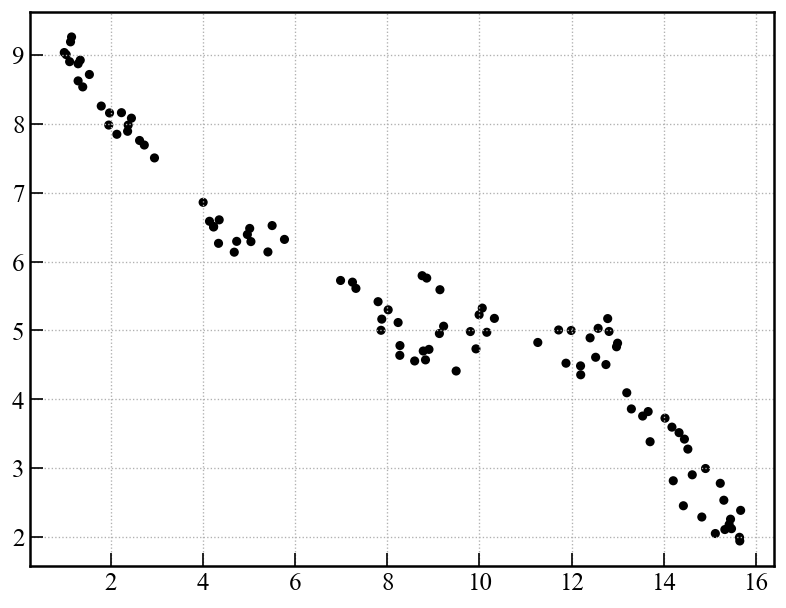

In [8]:
import umap
reducer = umap.UMAP()
reducer.fit(soap_array)
embedding = reducer.transform(soap_array)
#print(embedding.shape)

plt.figure(figsize=(8, 6))
#sc = plt.scatter(embedding[:, 0], embedding[:, 1], c=energy, cmap='viridis', s=20)
plt.scatter(embedding[:, 0], embedding[:, 1], c=umap_atom_color,cmap='viridis',s=20)

#plt.xlim(-2,13)
#plt.ylim(5,6)
#plt.colorbar(sc, label='Energy (eV/atom)')
#plt.title('UMAP display of SOAP data (colored by gen ? and gen ?)')
plt.show()
#plt.colorbar()


/var/folders/0f/_n97csts5c5c3ldj1k40vc100000gn/T/ipykernel_44745/2190786406.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], c=spacegroups_color,cmap='viridis', s=20)


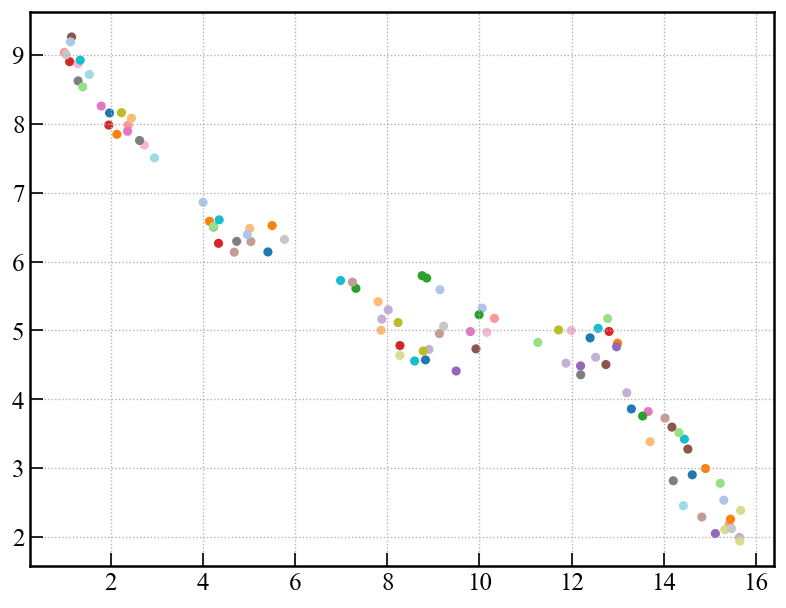

In [9]:
# Sample: get all unique space groups
unique_spacegroups = list(set(spacegroups))

# Assign a unique color to each space group
color_map = {sg: plt.cm.tab20(i % 20) for i, sg in enumerate(unique_spacegroups)}
#print(color_map)
# Now assign colors to your atoms list
spacegroups_color = [color_map[sg] for sg in spacegroups]
'''
for sg, color in color_map.items():
    print(f"{sg}: {color}")
'''
plt.scatter(embedding[:, 0], embedding[:, 1], c=spacegroups_color,cmap='viridis', s=20)
plt.show()

# DBSCAN Evaluation

In [10]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # Using a sample dataset for a runnable example

# 2. Fit the DBSCAN model
db = DBSCAN(eps=10, min_samples=3).fit(soap_array)
labels = db.labels_

# 3. Get basic clustering statistics
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")
print("-" * 30)


# 4. Evaluate the clustering performance
# IMPORTANT: Evaluation metrics can only be computed if there is more than 1 cluster.
if n_clusters_ > 1:
    # Create a mask to select only the data points that belong to a cluster
    is_clustered_mask = labels != -1

    # Filter the data and labels to exclude noise
    X_clustered = soap_array[is_clustered_mask]
    labels_clustered = labels[is_clustered_mask]

    # --- Calculate Evaluation Metrics ---
    
    # Silhouette Score: Measures how similar an object is to its own cluster compared to others.
    # The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
    silhouette_avg = metrics.silhouette_score(X_clustered, labels_clustered)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Calinski-Harabasz Score: Measures the ratio of between-cluster to within-cluster dispersion.
    # Higher values indicate better-defined clusters.
    ch_score = metrics.calinski_harabasz_score(X_clustered, labels_clustered)
    print(f"Calinski-Harabasz Score: {ch_score:.3f}")

    # Davies-Bouldin Score: Measures the average similarity between each cluster and its most similar one.
    # The minimum score is 0, with lower values indicating better clustering.
    db_score = metrics.davies_bouldin_score(X_clustered, labels_clustered)
    print(f"Davies-Bouldin Score: {db_score:.3f}")

else:
    print("Cannot calculate evaluation metrics with fewer than 2 clusters.")

Estimated number of clusters: 0
Estimated number of noise points: 100
------------------------------
Cannot calculate evaluation metrics with fewer than 2 clusters.


In [11]:

# ---> 5. Show Indices in Each Cluster <---
# This section is modified to print the original indices.

# Get the unique labels (e.g., -1, 0, 1, 2)
unique_labels = set(labels)

print("Displaying original indices for each cluster:")

for k in unique_labels:
    # Use np.where() to find the indices where the label matches the current cluster 'k'.
    # We use [0] because np.where returns a tuple of arrays, one for each dimension.
    # Since 'labels' is 1D, we just need the first element of the tuple.
    cluster_indices = np.where(labels == k)[0]
    
    if k == -1:
        # Special case for noise points
        print(f"\n--- Noise Points (Label -1) ---")
        print(f"Number of noise structures: {len(cluster_indices)}")
        print("Original indices:")
        print(cluster_indices) 
    else:
        # For all other clusters
        print(f"\n--- Cluster {k} ---")
        print(f"Number of structures: {len(cluster_indices)}")
        print("Original indices:")
        print(cluster_indices)

Displaying original indices for each cluster:

--- Noise Points (Label -1) ---
Number of noise structures: 100
Original indices:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


# Find Best Parameter

In [12]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs # Using make_blobs as it's better for these metrics
from sklearn.preprocessing import StandardScaler

# --- 1. Generate and Prepare Sample Data ---
# Using make_blobs because it creates clearer "blob" clusters, which evaluation
# metrics like Silhouette and Calinski-Harabasz are designed to score well.
# IMPORTANT: Replace this with your actual 'soap_array' data.


# --- 2. Define the Parameter Grid to Search ---
# IMPORTANT: You MUST adjust these ranges based on your specific data!
# A good way to estimate a starting range for 'eps' is the k-NN distance plot.
eps_range = np.arange(0.1, 10, 0.1) # Test eps values from 0.1 to 0.7
min_samples_range = [3, 4, 5, 7, 10, 15] # Test these min_samples values

# Store results
results = []


# --- 3. Perform the Grid Search ---
print("Starting grid search for DBSCAN parameters...")
for eps in eps_range:
    for min_samples in min_samples_range:
        # Fit the DBSCAN model
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(soap_array)
        labels = db.labels_

        # Get the number of clusters (ignoring noise)
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        
        # We can only calculate scores if there is more than 1 cluster
        if n_clusters_ > 1:
            # Filter out noise points for scoring
            is_clustered_mask = labels != -1
            X_clustered = soap_array[is_clustered_mask]
            labels_clustered = labels[is_clustered_mask]
            
            # If all points are clustered (no noise), we can't filter
            if len(X_clustered) == 0:
                continue

            # Calculate scores
            silhouette = metrics.silhouette_score(X_clustered, labels_clustered)
            calinski = metrics.calinski_harabasz_score(X_clustered, labels_clustered)
            davies = metrics.davies_bouldin_score(X_clustered, labels_clustered)
            
            # Store the results
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters_,
                'n_noise': n_noise_,
                'silhouette': silhouette,
                'calinski_harabasz': calinski,
                'davies_bouldin': davies
            })
            
            #print(f"eps={eps:.1f}, min_samples={min_samples}, n_clusters={n_clusters_}, Silhouette={silhouette:.3f}")

# --- 4. Analyze the Results ---¥
print("Grid Search Complete. Analyzing results...")

if not results:
    print("No valid clustering solutions found. Try adjusting the eps and min_samples ranges.")
else:
    # Convert results to a pandas DataFrame for easy analysis
    results_df = pd.DataFrame(results)
    
    # Find the best parameters for each metric
    # Silhouette Score (higher is better)
    best_silhouette = results_df.loc[results_df['silhouette'].idxmax()]

    # Calinski-Harabasz Score (higher is better)
    best_calinski = results_df.loc[results_df['calinski_harabasz'].idxmax()]

    # Davies-Bouldin Score (lower is better)
    best_davies = results_df.loc[results_df['davies_bouldin'].idxmin()]

    print("\n--- Best Parameters (by Silhouette Score) ---")
    print(best_silhouette)
    
    print("\n--- Best Parameters (by Calinski-Harabasz Score) ---")
    print(best_calinski)
    
    print("\n--- Best Parameters (by Davies-Bouldin Score) ---")
    print(best_davies)

Starting grid search for DBSCAN parameters...
Grid Search Complete. Analyzing results...
No valid clustering solutions found. Try adjusting the eps and min_samples ranges.


# DBSCAN Plot

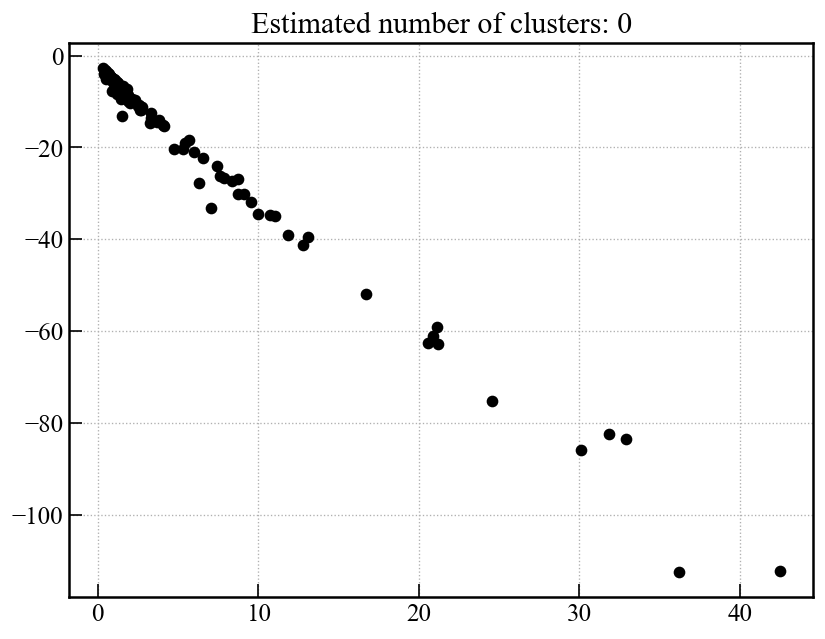

In [13]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = soap_array[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = soap_array[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()